In [1]:
% matplotlib inline
# % config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pickle
import time

### used for pooling intensity map
import skimage.measure
import skimage.restoration

from limlam_mocker import limlam_mocker as llm
#Get Parameters for run
from limlam_mocker import params        as params

import lnn as lnn

### load in models
from models_to_load import *

np.random.seed(1337)

%load_ext autoreload

In [2]:
%autoreload
# %autoreload 0
#%autoreload 2

# Setup Learning Enviornment

In [3]:
import tensorflow as tf
from tensorflow import keras

mapLoc = '../maps2/basic_Li/'
different_mapLoc = '../maps2/random_maps2/'
random_small_Li_mapLoc = '../maps2/random_small_Li/'
catLoc = '../catalogues2/'
modelLoc = '../models2/'
modelLoc2 = '../models3/'

### map info
numb_maps = 100
pix_x = 256
pix_y = 256

### output info
lum_func_size = 49

In [4]:
subFields = lnn.loadBaseFNames(mapLoc)
base = [mapLoc + s for s in subFields]
lumLogBinCents = lnn.loadData(base[152] + '_lum.npz')['logBinCent']

In [5]:
data = np.load(base[1583] + '_map.npz')

In [6]:
temp = np.ma.masked_equal(data['map_cube'],0)

masked_mean = np.mean(temp[~temp.mask].data)
masked_std = np.std(temp[~temp.mask].data)

mean = np.mean(data['map_cube'])
std = np.std(data['map_cube'])

log_data = np.log10(data['map_cube'][:,:,:]+1e-5)
log_mean = np.mean(log_data)
log_std = np.std(log_data)

print(np.mean(temp[~temp.mask].data))
print(np.std(temp[~temp.mask].data))

print(np.mean(data['map_cube']))
print(np.std(data['map_cube']))

print(log_mean)
print(log_std)

normed_log_data = (log_data - log_mean)/log_std

7.35679024707
29.8832983001
0.814195158899
10.2058249213
-4.41933986381
1.65942097629


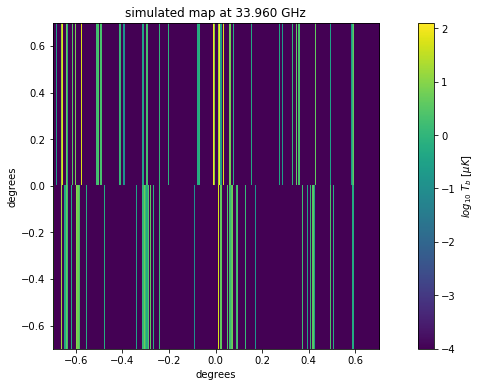

In [7]:
plt.figure(figsize=(14, 6))
im = plt.imshow(np.log10(data['map_cube'][0:2,:,0]+1e-4), 
                extent=[-data['fov_x']/2,data['fov_x']/2,-data['fov_y']/2,data['fov_y']/2])#,
                #vmin=-1,vmax=2)

plt.colorbar(im,label=r'$log_{10}\ T_b\ [\mu K]$')
plt.xlabel('degrees')
plt.ylabel('degrees')
plt.title('simulated map at {0:.3f} GHz'.format(data['map_frequencies'][0]))

In [29]:
from scipy.ndimage import gaussian_filter
import timeit

In [34]:
lim = data['map_cube']

In [35]:
lim = skimage.measure.block_reduce(data['map_cube'], (4, 4, 10), np.sum)
lim2 = skimage.measure.block_reduce(data['map_cube'], (16, 16, 10), np.sum)

In [46]:
lim3 = lim.reshape(len(lim), len(
            lim[0]), len(lim[0][0]), 1)

In [54]:
len(lim3.shape)

4

In [59]:
start = timeit.timeit()
result = gaussian_filter(lim, sigma=(3,3,0), truncate=1)
end = timeit.timeit()
print(end - start)

-0.0036387592554092407


In [55]:
start = timeit.timeit()
result2 = gaussian_filter(lim3, sigma=(3,3,0,0), truncate=1)
end = timeit.timeit()
print(end - start)

0.0019364356994628906


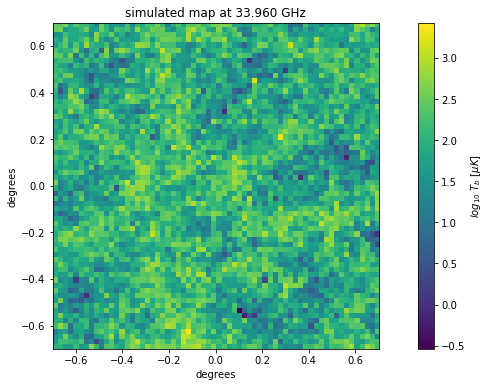

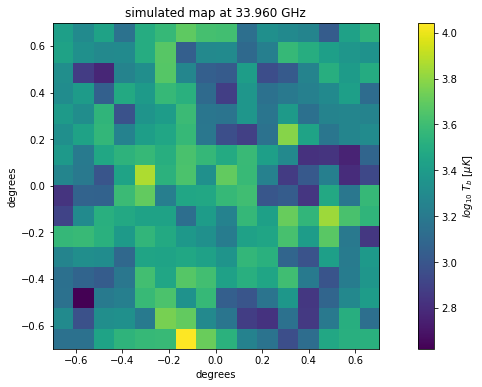

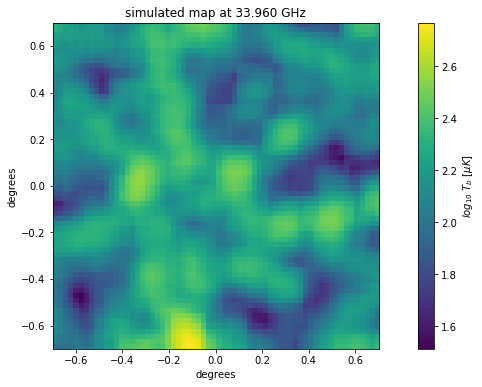

In [56]:
plt.figure(figsize=(14, 6))
im = plt.imshow(lnn.log_modulus(lim[:,:,0]),
                extent=[-data['fov_x']/2,data['fov_x']/2,-data['fov_y']/2,data['fov_y']/2])#,
                #vmin=-1,vmax=2)

plt.colorbar(im,label=r'$log_{10}\ T_b\ [\mu K]$')
plt.xlabel('degrees')
plt.ylabel('degrees')
plt.title('simulated map at {0:.3f} GHz'.format(data['map_frequencies'][0]))

plt.show()

plt.figure(figsize=(14, 6))
im = plt.imshow(lnn.log_modulus(lim2[:,:,0]),
                extent=[-data['fov_x']/2,data['fov_x']/2,-data['fov_y']/2,data['fov_y']/2])#,
                #vmin=-1,vmax=2)

plt.colorbar(im,label=r'$log_{10}\ T_b\ [\mu K]$')
plt.xlabel('degrees')
plt.ylabel('degrees')
plt.title('simulated map at {0:.3f} GHz'.format(data['map_frequencies'][0]))

plt.show()

plt.figure(figsize=(14, 6))
im = plt.imshow(lnn.log_modulus(result2[:,:,0,0]),
                extent=[-data['fov_x']/2,data['fov_x']/2,-data['fov_y']/2,data['fov_y']/2])#,
                #vmin=-1,vmax=2)

plt.colorbar(im,label=r'$log_{10}\ T_b\ [\mu K]$')
plt.xlabel('degrees')
plt.ylabel('degrees')
plt.title('simulated map at {0:.3f} GHz'.format(data['map_frequencies'][0]))

plt.show()

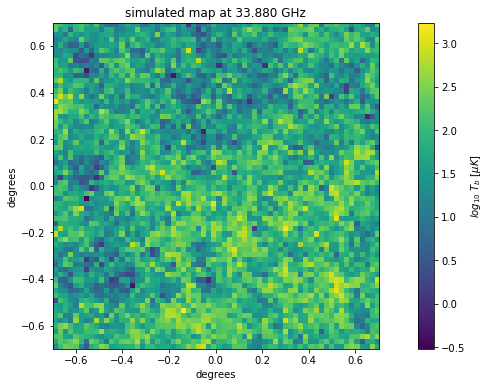

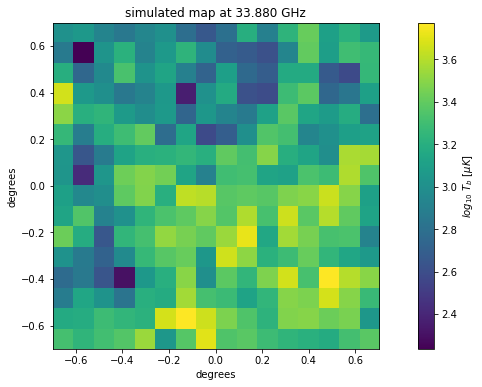

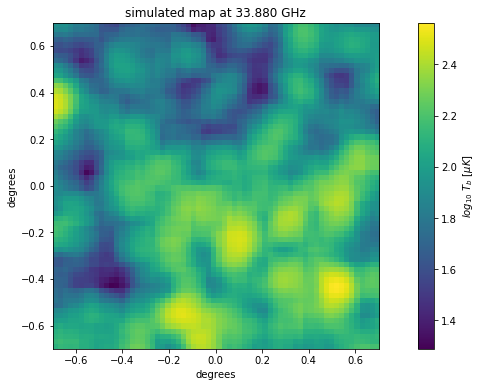

In [57]:
plt.figure(figsize=(14, 6))
im = plt.imshow(lnn.log_modulus(lim[:,:,1]),
                extent=[-data['fov_x']/2,data['fov_x']/2,-data['fov_y']/2,data['fov_y']/2])#,
                #vmin=-1,vmax=2)

plt.colorbar(im,label=r'$log_{10}\ T_b\ [\mu K]$')
plt.xlabel('degrees')
plt.ylabel('degrees')
plt.title('simulated map at {0:.3f} GHz'.format(data['map_frequencies'][1]))

plt.show()

plt.figure(figsize=(14, 6))
im = plt.imshow(lnn.log_modulus(lim2[:,:,1]),
                extent=[-data['fov_x']/2,data['fov_x']/2,-data['fov_y']/2,data['fov_y']/2])#,
                #vmin=-1,vmax=2)

plt.colorbar(im,label=r'$log_{10}\ T_b\ [\mu K]$')
plt.xlabel('degrees')
plt.ylabel('degrees')
plt.title('simulated map at {0:.3f} GHz'.format(data['map_frequencies'][1]))

plt.show()

plt.figure(figsize=(14, 6))
im = plt.imshow(lnn.log_modulus(result2[:,:,1,0]),
                extent=[-data['fov_x']/2,data['fov_x']/2,-data['fov_y']/2,data['fov_y']/2])#,
                #vmin=-1,vmax=2)

plt.colorbar(im,label=r'$log_{10}\ T_b\ [\mu K]$')
plt.xlabel('degrees')
plt.ylabel('degrees')
plt.title('simulated map at {0:.3f} GHz'.format(data['map_frequencies'][1]))

plt.show()

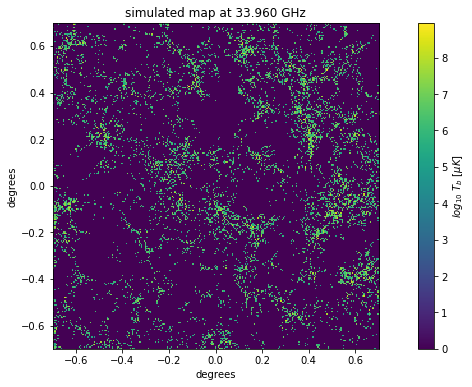

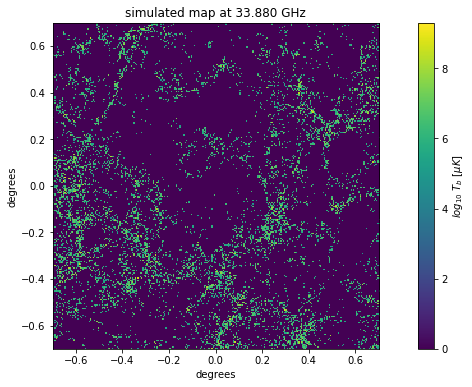

In [76]:
for i in range(2):
    plt.figure(figsize=(14, 6))
    im = plt.imshow(np.log10(data['map_cube'][:,:,i]+1e-6)+6,
#     im = plt.imshow(data['map_cube'][:,:,i],
                    extent=[-data['fov_x']/2,data['fov_x']/2,-data['fov_y']/2,data['fov_y']/2])#,
                    #vmin=-1,vmax=2)

    plt.colorbar(im,label=r'$log_{10}\ T_b\ [\mu K]$')
    plt.xlabel('degrees')
    plt.ylabel('degrees')
    plt.title('simulated map at {0:.3f} GHz'.format(data['map_frequencies'][i]))
    
    plt.show()

In [8]:
test = skimage.measure.block_reduce(data['map_cube'], (4,4,10), np.sum)

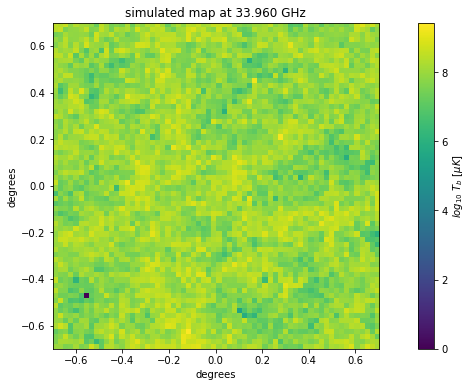

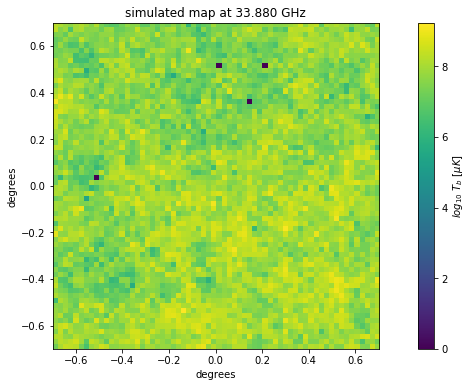

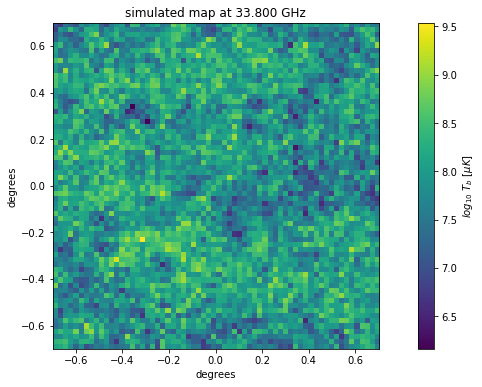

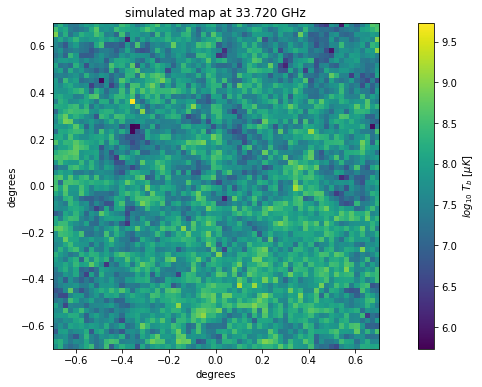

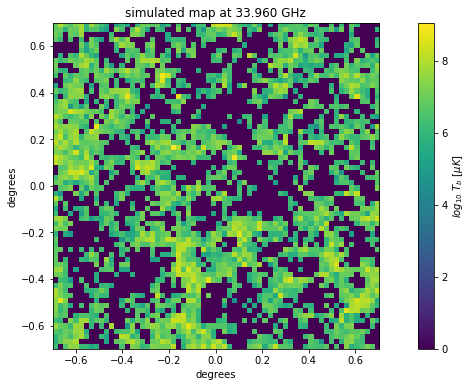

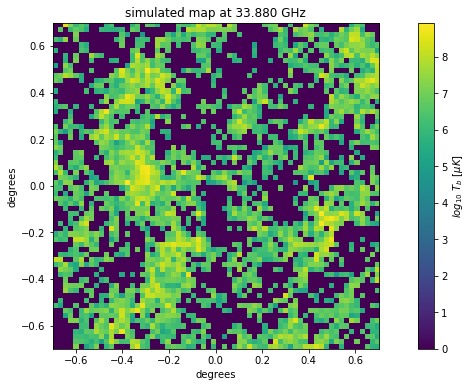

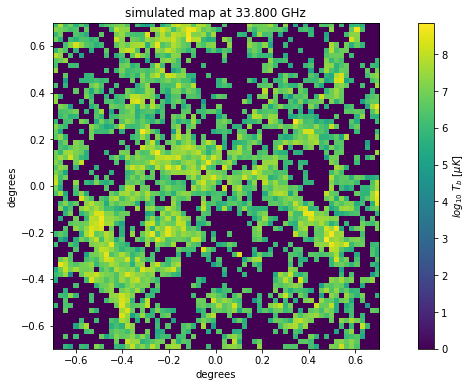

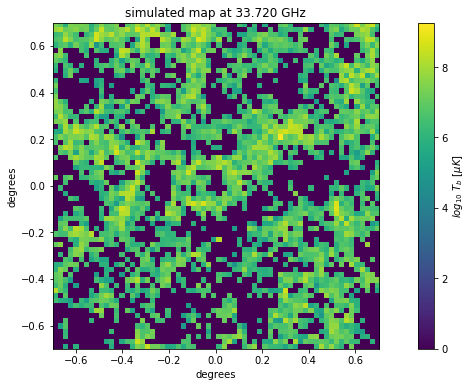

In [13]:
test = skimage.measure.block_reduce(data['map_cube'], (4,4,10), np.sum)
for i in range(4):    
    plt.figure(figsize=(14, 6))
    temp_map = np.log10(test+1e-6)
    temp_map = temp_map - np.min(temp_map)
    im = plt.imshow(temp_map[:,:,i],
#     im = plt.imshow(test[:,:,0],
                extent=[-data['fov_x']/2,data['fov_x']/2,-data['fov_y']/2,data['fov_y']/2])#,
                #vmin=-1,vmax=2)

    plt.colorbar(im,label=r'$log_{10}\ T_b\ [\mu K]$')
    plt.xlabel('degrees')
    plt.ylabel('degrees')
    plt.title('simulated map at {0:.3f} GHz'.format(data['map_frequencies'][i]))

    plt.show()
    
test = skimage.measure.block_reduce(data['map_cube'], (4,4,1), np.sum)
for i in range(4):    
    plt.figure(figsize=(14, 6))
    temp_map = np.log10(test+1e-6)
    temp_map = temp_map - np.min(temp_map)
    im = plt.imshow(temp_map[:,:,i],
#     im = plt.imshow(test[:,:,0],
                extent=[-data['fov_x']/2,data['fov_x']/2,-data['fov_y']/2,data['fov_y']/2])#,
                #vmin=-1,vmax=2)

    plt.colorbar(im,label=r'$log_{10}\ T_b\ [\mu K]$')
    plt.xlabel('degrees')
    plt.ylabel('degrees')
    plt.title('simulated map at {0:.3f} GHz'.format(data['map_frequencies'][i]))

    plt.show()

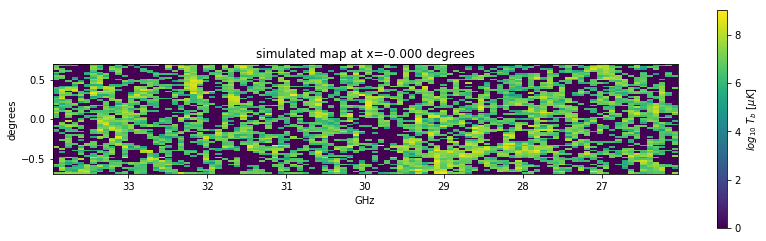

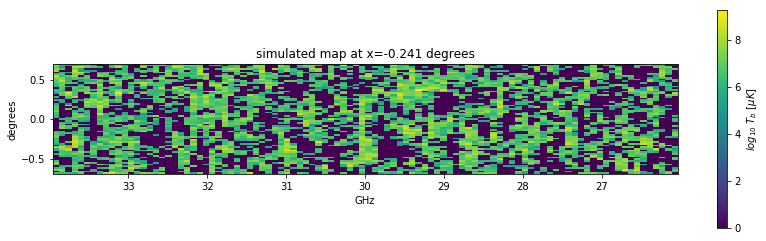

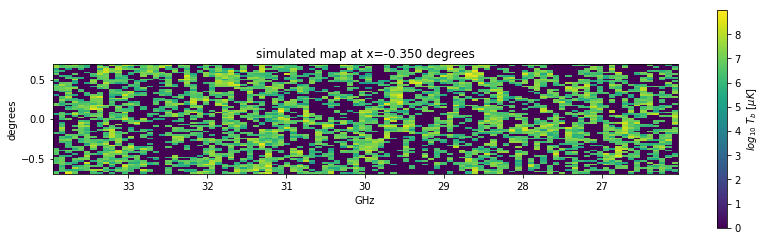

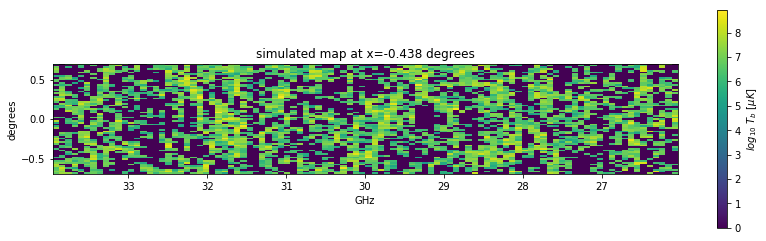

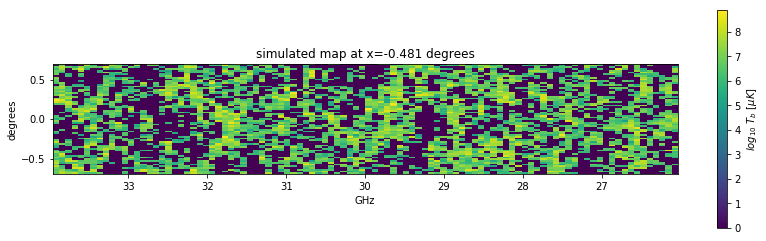

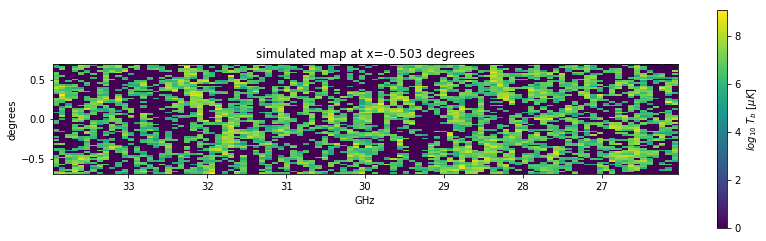

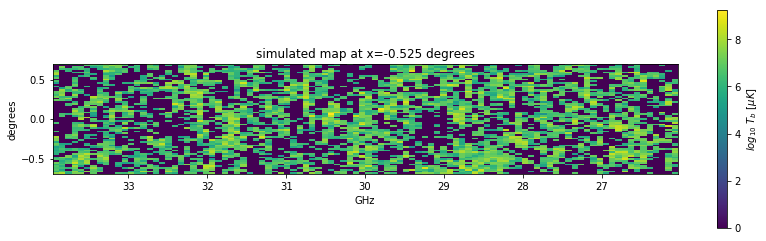

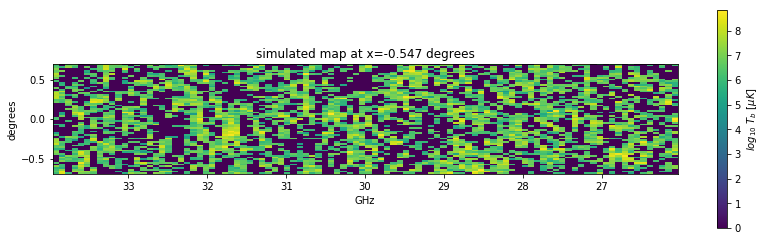

In [73]:
for i in range(2,10):
    plt.figure(figsize=(14, 4))
    temp_map = np.log10(test+1e-6)
    temp_map = temp_map - np.min(temp_map)
    im = plt.imshow(temp_map[int(64/i),:,:],
    #     im = plt.imshow(test[:,:,0],
                extent=[data['map_frequencies'][0],data['map_frequencies'][-1],-data['fov_y']/2,data['fov_y']/2])#,
                #vmin=-1,vmax=2)

    plt.colorbar(im,label=r'$log_{10}\ T_b\ [\mu K]$')
    plt.xlabel('GHz')
    plt.ylabel('degrees')
    bleh = -data['fov_x'] * ((int(len(temp_map)/2) - int(64/i)))/int(len(temp_map))
    plt.title('simulated map at x={0:.3f} degrees'.format(bleh))

    plt.show()

In [7]:
%autoreload

In [9]:
lumLogBinCents[:-14]

array([   3433.32001828,    4047.08995076,    4770.58269614,
          5623.4132519 ,    6628.70316183,    7813.70737652,
          9210.55317689,   10857.11119402,   12798.02213998,
         15085.907086  ,   17782.79410039,   20961.79992453,
         24709.11227986,   29126.32654909,   34333.20018282,
         40470.8995076 ,   47705.82696144,   56234.13251903,
         66287.03161826,   78137.07376518,   92105.53176895,
        108571.11194022,  127980.2213998 ,  150859.07086002,
        177827.94100389,  209617.99924531,  247091.12279856,
        291263.26549087,  343332.0018282 ,  404708.99507598,
        477058.26961439,  562341.32519035,  662870.31618264,
        781370.73765181,  921055.31768948])

In [10]:
lumLogBinCents[:len(lumLogBinCents)-14]

array([   3433.32001828,    4047.08995076,    4770.58269614,
          5623.4132519 ,    6628.70316183,    7813.70737652,
          9210.55317689,   10857.11119402,   12798.02213998,
         15085.907086  ,   17782.79410039,   20961.79992453,
         24709.11227986,   29126.32654909,   34333.20018282,
         40470.8995076 ,   47705.82696144,   56234.13251903,
         66287.03161826,   78137.07376518,   92105.53176895,
        108571.11194022,  127980.2213998 ,  150859.07086002,
        177827.94100389,  209617.99924531,  247091.12279856,
        291263.26549087,  343332.0018282 ,  404708.99507598,
        477058.26961439,  562341.32519035,  662870.31618264,
        781370.73765181,  921055.31768948])

In [11]:
len(lumLogBinCents)-14

35

In [7]:
mapData = data['map_cube']

In [44]:
noise = np.random.normal(0, 20, mapData.shape)

In [45]:
pool_noise = np.random.normal(0, np.sqrt(160)*20, (64,64,10))

In [46]:
pool_noise2 = np.random.normal(160/np.sqrt(2*np.pi) * 11, np.sqrt(160/2*(1 - 1/np.pi))*11, (64,64,10))

In [47]:
newMap = noise + mapData

In [48]:
newMap = skimage.measure.block_reduce(newMap, (4, 4, 10), np.sum)

In [49]:
pool_map = pool_noise + skimage.measure.block_reduce(mapData, (4, 4, 10), np.sum)

In [50]:
pool_map2 = pool_noise2 + skimage.measure.block_reduce(mapData, (4, 4, 10), np.sum)

In [51]:
print(np.min(newMap), np.max(newMap))

-1010.71612654 5513.05598042


In [52]:
print(np.min(pool_map), np.max(pool_map))

-1005.1451703 5282.63859521


In [53]:
print(np.min(pool_map2), np.max(pool_map2))

414.886394561 6131.45572527


In [87]:
pool_noise = np.random.normal(0, np.sqrt(160)*20, (64,64,10))
reduced_map = skimage.measure.block_reduce(mapData, (4, 4, 10), np.sum)
pool_map = pool_noise + reduced_map

In [88]:
new_transform = np.sign(pool_map) * np.log10(np.abs(pool_map) + 1e-6)
new_transform2 = np.sign(reduced_map) * np.log10(np.abs(reduced_map) + 1e-6)

In [95]:
np.sign(0)

0

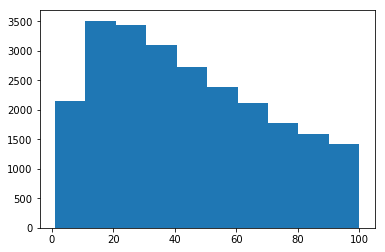

In [104]:
plt.hist(np.reshape(reduced_map, reduced_map.size), range=[1,100])
plt.show()

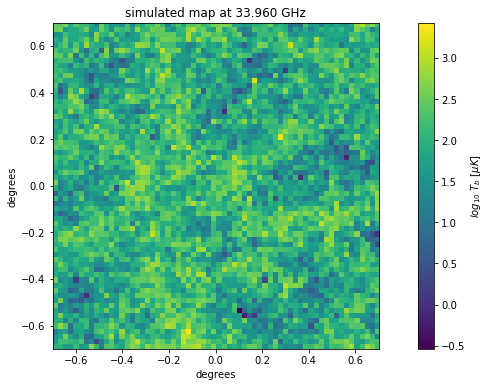

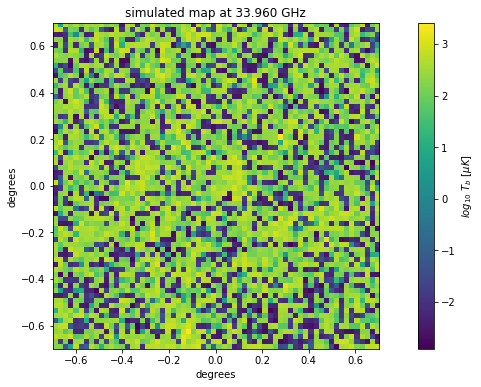

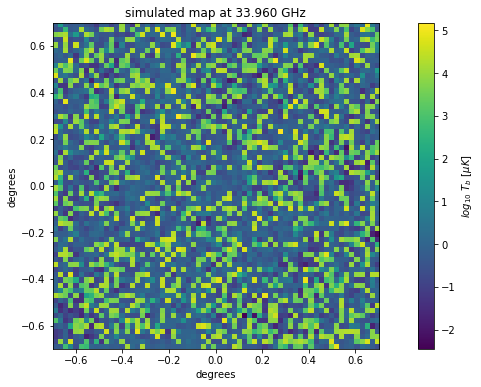

In [91]:
for i in range(1):
    plt.figure(figsize=(14, 6))
#     im = plt.imshow(np.log10(pool_map[:,:,i]+1e3)-3,
    im = plt.imshow(new_transform2[:,:,i],
                    extent=[-data['fov_x']/2,data['fov_x']/2,-data['fov_y']/2,data['fov_y']/2])#,
#                     vmin=-1000,vmax=1000)

    plt.colorbar(im,label=r'$log_{10}\ T_b\ [\mu K]$')
    plt.xlabel('degrees')
    plt.ylabel('degrees')
    plt.title('simulated map at {0:.3f} GHz'.format(data['map_frequencies'][i]))
    
for i in range(1):
    plt.figure(figsize=(14, 6))
#     im = plt.imshow(np.log10(pool_map[:,:,i]+1e3)-3,
    im = plt.imshow(new_transform[:,:,i],
                    extent=[-data['fov_x']/2,data['fov_x']/2,-data['fov_y']/2,data['fov_y']/2])#,
#                     vmin=-1000,vmax=1000)

    plt.colorbar(im,label=r'$log_{10}\ T_b\ [\mu K]$')
    plt.xlabel('degrees')
    plt.ylabel('degrees')
    plt.title('simulated map at {0:.3f} GHz'.format(data['map_frequencies'][i]))
    
for i in range(1):
    plt.figure(figsize=(14, 6))
#     im = plt.imshow(np.log10(pool_map[:,:,i]+1e3)-3,
    im = plt.imshow((new_transform2-new_transform)[:,:,i],
                    extent=[-data['fov_x']/2,data['fov_x']/2,-data['fov_y']/2,data['fov_y']/2])#,
#                     vmin=-1000,vmax=1000)

    plt.colorbar(im,label=r'$log_{10}\ T_b\ [\mu K]$')
    plt.xlabel('degrees')
    plt.ylabel('degrees')
    plt.title('simulated map at {0:.3f} GHz'.format(data['map_frequencies'][i]))

/home/dpfeffe2/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


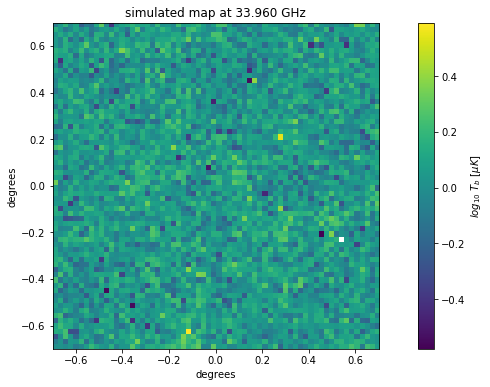

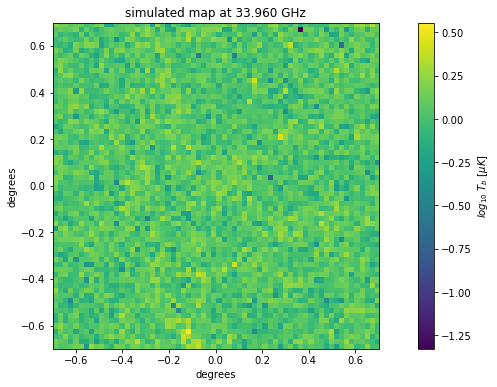

In [54]:
for i in range(1):
    plt.figure(figsize=(14, 6))
    im = plt.imshow(np.log10(newMap[:,:,i]+1e3)-3,
#     im = plt.imshow(newMap[:,:,i],
                    extent=[-data['fov_x']/2,data['fov_x']/2,-data['fov_y']/2,data['fov_y']/2])#,
                    #vmin=-1,vmax=2)

    plt.colorbar(im,label=r'$log_{10}\ T_b\ [\mu K]$')
    plt.xlabel('degrees')
    plt.ylabel('degrees')
    plt.title('simulated map at {0:.3f} GHz'.format(data['map_frequencies'][i]))
    
    plt.show()
    
for i in range(1):
    plt.figure(figsize=(14, 6))
    im = plt.imshow(np.log10(pool_map[:,:,i]+1e3)-3,
#     im = plt.imshow(pool_map[:,:,i],
                    extent=[-data['fov_x']/2,data['fov_x']/2,-data['fov_y']/2,data['fov_y']/2])#,
                    #vmin=-1,vmax=2)

    plt.colorbar(im,label=r'$log_{10}\ T_b\ [\mu K]$')
    plt.xlabel('degrees')
    plt.ylabel('degrees')
    plt.title('simulated map at {0:.3f} GHz'.format(data['map_frequencies'][i]))
    
    plt.show()
    
# for i in range(1):
#     plt.figure(figsize=(14, 6))
#     im = plt.imshow(np.log10(pool_map2[:,:,i]+1e-6)+6,
# #     im = plt.imshow(pool_map[:,:,i],
#                     extent=[-data['fov_x']/2,data['fov_x']/2,-data['fov_y']/2,data['fov_y']/2])#,
#                     #vmin=-1,vmax=2)

#     plt.colorbar(im,label=r'$log_{10}\ T_b\ [\mu K]$')
#     plt.xlabel('degrees')
#     plt.ylabel('degrees')
#     plt.title('simulated map at {0:.3f} GHz'.format(data['map_frequencies'][i]))
    
#     plt.show()
    
# for i in range(1):
#     plt.figure(figsize=(14, 6))
#     im = plt.imshow(np.log10(pool_map2[:,:,i]+1e3)-3,
# #     im = plt.imshow(pool_map[:,:,i],
#                     extent=[-data['fov_x']/2,data['fov_x']/2,-data['fov_y']/2,data['fov_y']/2])#,
#                     #vmin=-1,vmax=2)

#     plt.colorbar(im,label=r'$log_{10}\ T_b\ [\mu K]$')
#     plt.xlabel('degrees')
#     plt.ylabel('degrees')
#     plt.title('simulated map at {0:.3f} GHz'.format(data['map_frequencies'][i]))
    
#     plt.show()
    
# for i in range(1):
#     plt.figure(figsize=(14, 6))
#     im = plt.imshow(np.log10(pool_map2[:,:,i]+1e-6)-(np.log10(pool_map2[:,:,i]+1e3)),
# #     im = plt.imshow(pool_map[:,:,i],
#                     extent=[-data['fov_x']/2,data['fov_x']/2,-data['fov_y']/2,data['fov_y']/2])#,
#                     #vmin=-1,vmax=2)

#     plt.colorbar(im,label=r'$log_{10}\ T_b\ [\mu K]$')
#     plt.xlabel('degrees')
#     plt.ylabel('degrees')
#     plt.title('simulated map at {0:.3f} GHz'.format(data['map_frequencies'][i]))
    
#     plt.show()

In [23]:
np.sqrt(160)*11

139.1402170474087

In [24]:
np.sqrt(160/2*(1 - 1/np.pi))*11

81.23275387268923

In [29]:
noise = np.random.normal(0, 20, mapData.shape)
noise = skimage.measure.block_reduce(noise, (4, 4, 10), np.sum)
pool_noise = np.random.normal(0, np.sqrt(160)*11, (64,64,10))
pool_noise2 = np.random.normal(160/np.sqrt(2*np.pi) * 11, np.sqrt(160/2*(1 - 1/np.pi))*11, (64,64,10))

In [30]:
noise = np.reshape(noise, noise.size)
pool_noise = np.reshape(pool_noise, pool_noise.size)
pool_noise2 = np.reshape(pool_noise2, pool_noise.size)

In [31]:
temp = stats.skewnorm(.2, 0, 11).rvs(mapData.shape)
temp = skimage.measure.block_reduce(temp, (4, 4, 10), np.sum)
temp = np.reshape(temp, temp.size)

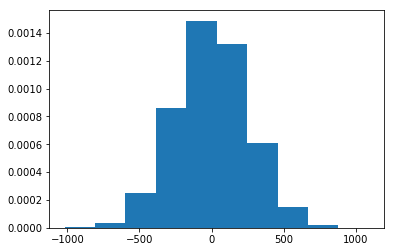

In [32]:
plt.hist(noise, normed=True)
# plt.hist(pool_noise, normed=True)
# plt.hist(pool_noise2, normed=True)
# plt.hist(temp, normed=True)
plt.show()

In [22]:
from scipy import stats

In [172]:
temp = stats.skewnorm(0, 0, 1000).rvs(10000)

In [176]:
temp

array([ -3.04292396, -16.52859676,  -9.56882091, ...,   2.90169283,
        11.95092108,  21.31791178])

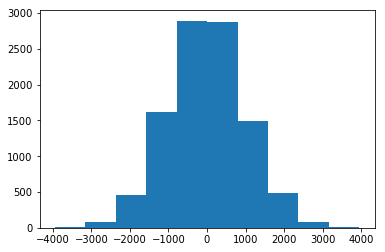

In [173]:
plt.hist(temp)
plt.show()

In [260]:
def tt(x, n):
    print(x)
    
    t = time.time()
    if np.ndim(n) == 1:
        print(n)
    e = time.time()
    print(e-t)
    
    t = time.time()
    if isinstance(n, (tuple, list, np.ndarray)):
        print(n)
    e = time.time()
    print(e-t)

In [261]:
tt(1, (2, 4, 4))

1
(2, 4, 4)
0.00013446807861328125
(2, 4, 4)
5.412101745605469e-05


In [262]:
tt(1, [2])

1
[2]
0.00011897087097167969
[2]
5.53131103515625e-05


In [274]:
np.random.uniform(0, 20)

19.250703526229053

In [7]:
%autoreload

In [8]:
mapData = data['map_cube']

In [9]:
newMap = skimage.measure.block_reduce(mapData, (4, 4, 10), np.sum)

In [10]:
noise_map = np.zeros((256, 256, 100))

In [11]:
noise_fraction = 1/22
map_length = noise_map.shape[0]
max_noise = 100

In [12]:
def geometric_noise(i, j, shape, noise_fraction, max_noise):
    if i < 0:
        i = shape[0]+i
    if j < 0:
        j = shape[1]+j
    
    x_frac = i/shape[0]
    # if the pixel is more then halfway consider 1-x_pix_location
    if x_frac > 0.5:
        x_frac = 1 - x_frac
    x_noise = max(1.0-x_frac/noise_fraction, 0)
    x_noise = x_noise * max_noise
        
    y_frac = j/shape[1]
    # if the pixel is more then halfway consider 1-x_pix_location
    if y_frac > 0.5:
        y_frac = 1 - y_frac
    y_noise = max(1.0-y_frac/noise_fraction, 0)
    y_noise = y_noise * max_noise
        
    noise_frac = max(x_noise, y_noise)
    noise = np.random.normal(0, noise_frac * max_noise)

    return(noise)

In [13]:
noise_map = np.zeros((256, 256, 100))

x_max = int(noise_fraction*noise_map.shape[0])
y_max = int(noise_fraction*noise_map.shape[1])
x_range = np.arange(-x_max, x_max)
y_range = np.arange(-y_max, y_max)

t = time.time()
for i in x_range:
    for j in range(noise_map.shape[1]):
        for k in range(noise_map.shape[2]):
            noise_map[i,j,k] = geometric_noise(i, j, noise_map.shape, noise_fraction, max_noise)
            
for i in range(noise_map.shape[0]):
    for j in y_range:
        for k in range(noise_map.shape[2]):
            noise_map[i,j,k] = geometric_noise(i, j, noise_map.shape, noise_fraction, max_noise)
e = time.time()
print(e-t)

11.474404573440552


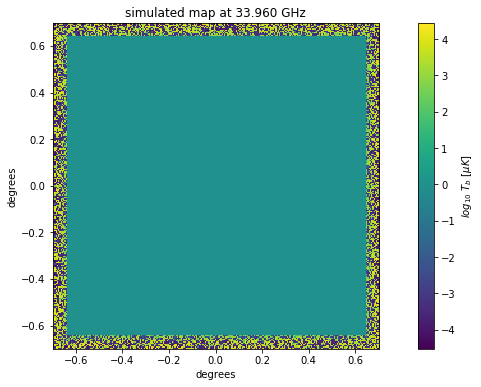

In [143]:
i = 0

# comb = mapData
comb = noise_map# + mapData

plt.figure(figsize=(14, 6))
im = plt.imshow(lnn.log_modulus(comb)[:,:,i],
# im = plt.imshow(comb[:,:,i],
            extent=[-data['fov_x']/2,data['fov_x']/2,-data['fov_y']/2,data['fov_y']/2])#,
            #vmin=-1,vmax=2)

plt.colorbar(im,label=r'$log_{10}\ T_b\ [\mu K]$')
plt.xlabel('degrees')
plt.ylabel('degrees')
plt.title('simulated map at {0:.3f} GHz'.format(data['map_frequencies'][i]))

plt.show()

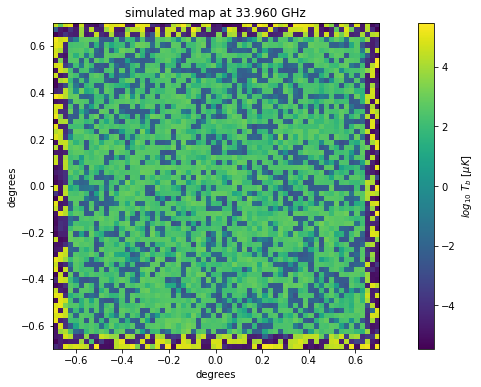

In [144]:
i = 0

new_noise = skimage.measure.block_reduce(noise_map, (4, 4, 10), np.sum)
pool_noise = np.random.normal(0, np.sqrt(160)*20, (64,64,10))

# comb2 = newMap
comb2 = new_noise + newMap + pool_noise

plt.figure(figsize=(14, 6))
im = plt.imshow(lnn.log_modulus(comb2)[:,:,i],
# im = plt.imshow(comb2[:,:,i],
            extent=[-data['fov_x']/2,data['fov_x']/2,-data['fov_y']/2,data['fov_y']/2])#,
            #vmin=-1,vmax=2)

plt.colorbar(im,label=r'$log_{10}\ T_b\ [\mu K]$')
plt.xlabel('degrees')
plt.ylabel('degrees')
plt.title('simulated map at {0:.3f} GHz'.format(data['map_frequencies'][i]))

plt.show()

In [14]:
lums = np.load(base[1583] + '_lum.npz')

In [15]:
lumFunc = lums['lumFunc']
logBinCent = lums['logBinCent']

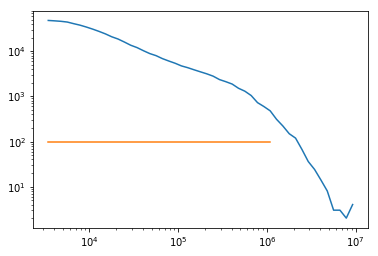

In [16]:
plt.loglog(logBinCent, lumFunc)
plt.loglog(logBinCent[:36], logBinCent[:36]/logBinCent[:36] * 10**2)
plt.show()

In [17]:
logBinCent[:36]

array([    3433.32001828,     4047.08995076,     4770.58269614,
           5623.4132519 ,     6628.70316183,     7813.70737652,
           9210.55317689,    10857.11119402,    12798.02213998,
          15085.907086  ,    17782.79410039,    20961.79992453,
          24709.11227986,    29126.32654909,    34333.20018282,
          40470.8995076 ,    47705.82696144,    56234.13251903,
          66287.03161826,    78137.07376518,    92105.53176895,
         108571.11194022,   127980.2213998 ,   150859.07086002,
         177827.94100389,   209617.99924531,   247091.12279856,
         291263.26549087,   343332.0018282 ,   404708.99507598,
         477058.26961439,   562341.32519035,   662870.31618264,
         781370.73765181,   921055.31768948,  1085711.1194022 ])

In [53]:
from scipy.stats import skewnorm, skew

In [54]:
def skewed_distribution(mean, std, skew, shape):
    skew_dist = skewnorm(skew, mean, std)
    skewed_data = (skew_dist.rvs(shape) - skew_dist.mean()) * std/skew_dist.std()
    return(skewed_data)

In [55]:
temp_skew = skewnorm(1, 0, 11)

In [116]:
skew_val = 0.5
stdev = 11
mean = 0

delta = skew_val / np.sqrt(1. + skew_val**2.)
adjStdev = np.sqrt(stdev**2 / (1. - 2. * delta**2 / np.pi))
adjMean = mean - adjStdev * np.sqrt(2. / np.pi) * delta

print(skewnorm.stats(skew_val, loc=adjMean, scale=adjStdev, moments='mvs'))
skew_dist = skewnorm(skew_val, loc=adjMean, scale=adjStdev)
skewed_data = skew_dist.rvs(mapData.size)

(array(8.881784197001252e-16), array(121.00000000000001), array(0.023919330826654192))


In [112]:
print(np.mean(skewed_data))
print(np.std(skewed_data))
print(skew(skewed_data, bias=True))

-0.00437225694551
11.0039689331
0.023176051089506933


In [20]:
print(temp_skew.mean())
print(temp_skew.std())

6.20608541903
9.08209798294


In [21]:
np.std( (temp_skew.rvs(10**5) - temp_skew.mean()) * 11/temp_skew.std() )

11.012127208128724

In [44]:
skewed_data = skewed_distribution(0, 11, 100, 10**5)

In [42]:
print(np.mean(skewed_data))
print(np.std(skewed_data))
print(skew(skewed_data))

0.0455043220018
11.0181443047
0.9803617806840177


In [101]:
skewed = skewnorm(.2, 0, 11).rvs(mapData.size)
norm = np.random.normal(0, 11, mapData.size)

In [93]:
skewed2 = skewnorm(1, 0, 11).rvs(mapData.size)
skewed3 = skewnorm(4, 0, 11).rvs(mapData.size)
skewed4 = skewnorm(10, 0, 11).rvs(mapData.size)

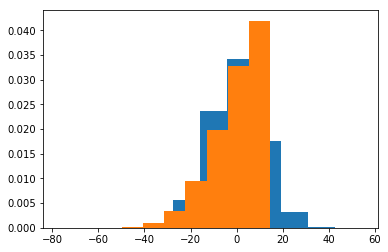

In [107]:
plt.hist(norm, normed=True)
# plt.hist(skewed, normed=True)
# plt.hist(skewed2, normed=True)
# plt.hist(skewed3, normed=True)
# plt.hist(skewed4, normed=True)
plt.hist(skewed_data, normed=True)
plt.show()

In [117]:
new_norm = np.sum(norm.reshape(160, -1), axis=1)
new_skewed_data = np.sum(skewed_data.reshape(160, -1), axis=1)
# new_skewed = np.sum(skewed.reshape(160, -1), axis=1)
# new_skewed2 = np.sum(skewed2.reshape(160, -1), axis=1)
# new_skewed3 = np.sum(skewed3.reshape(160, -1), axis=1)
# new_skewed4 = np.sum(skewed4.reshape(160, -1), axis=1)

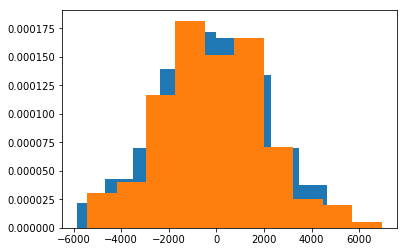

In [118]:
plt.hist(new_norm, normed=True)
plt.hist(new_skewed_data, normed=True)
# plt.hist(new_skewed, normed=True)
# plt.hist(new_skewed2, normed=True)
# plt.hist(new_skewed3, normed=True)
# plt.hist(new_skewed4, normed=True)
plt.show()

In [119]:
skew(new_skewed_data)

0.15050669353277563

In [120]:
skew(new_norm)

-0.06939368850152772